In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, time, datetime
import time
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
plt.style.use('ggplot')

In [2]:
AMZN = pd.read_csv('C:/Users/seant/stock_analyzer/capstone_3/data/AMZN.csv')
GOOG = pd.read_csv('C:/Users/seant/stock_analyzer/capstone_3/data/GOOG.csv')
AAPL = pd.read_csv('C:/Users/seant/stock_analyzer/capstone_3/data/AAPL.csv')

In [12]:
AMZN.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
stock_dic = {'AMZN':AMZN, 'GOOG':GOOG, 'AAPL':AAPL}

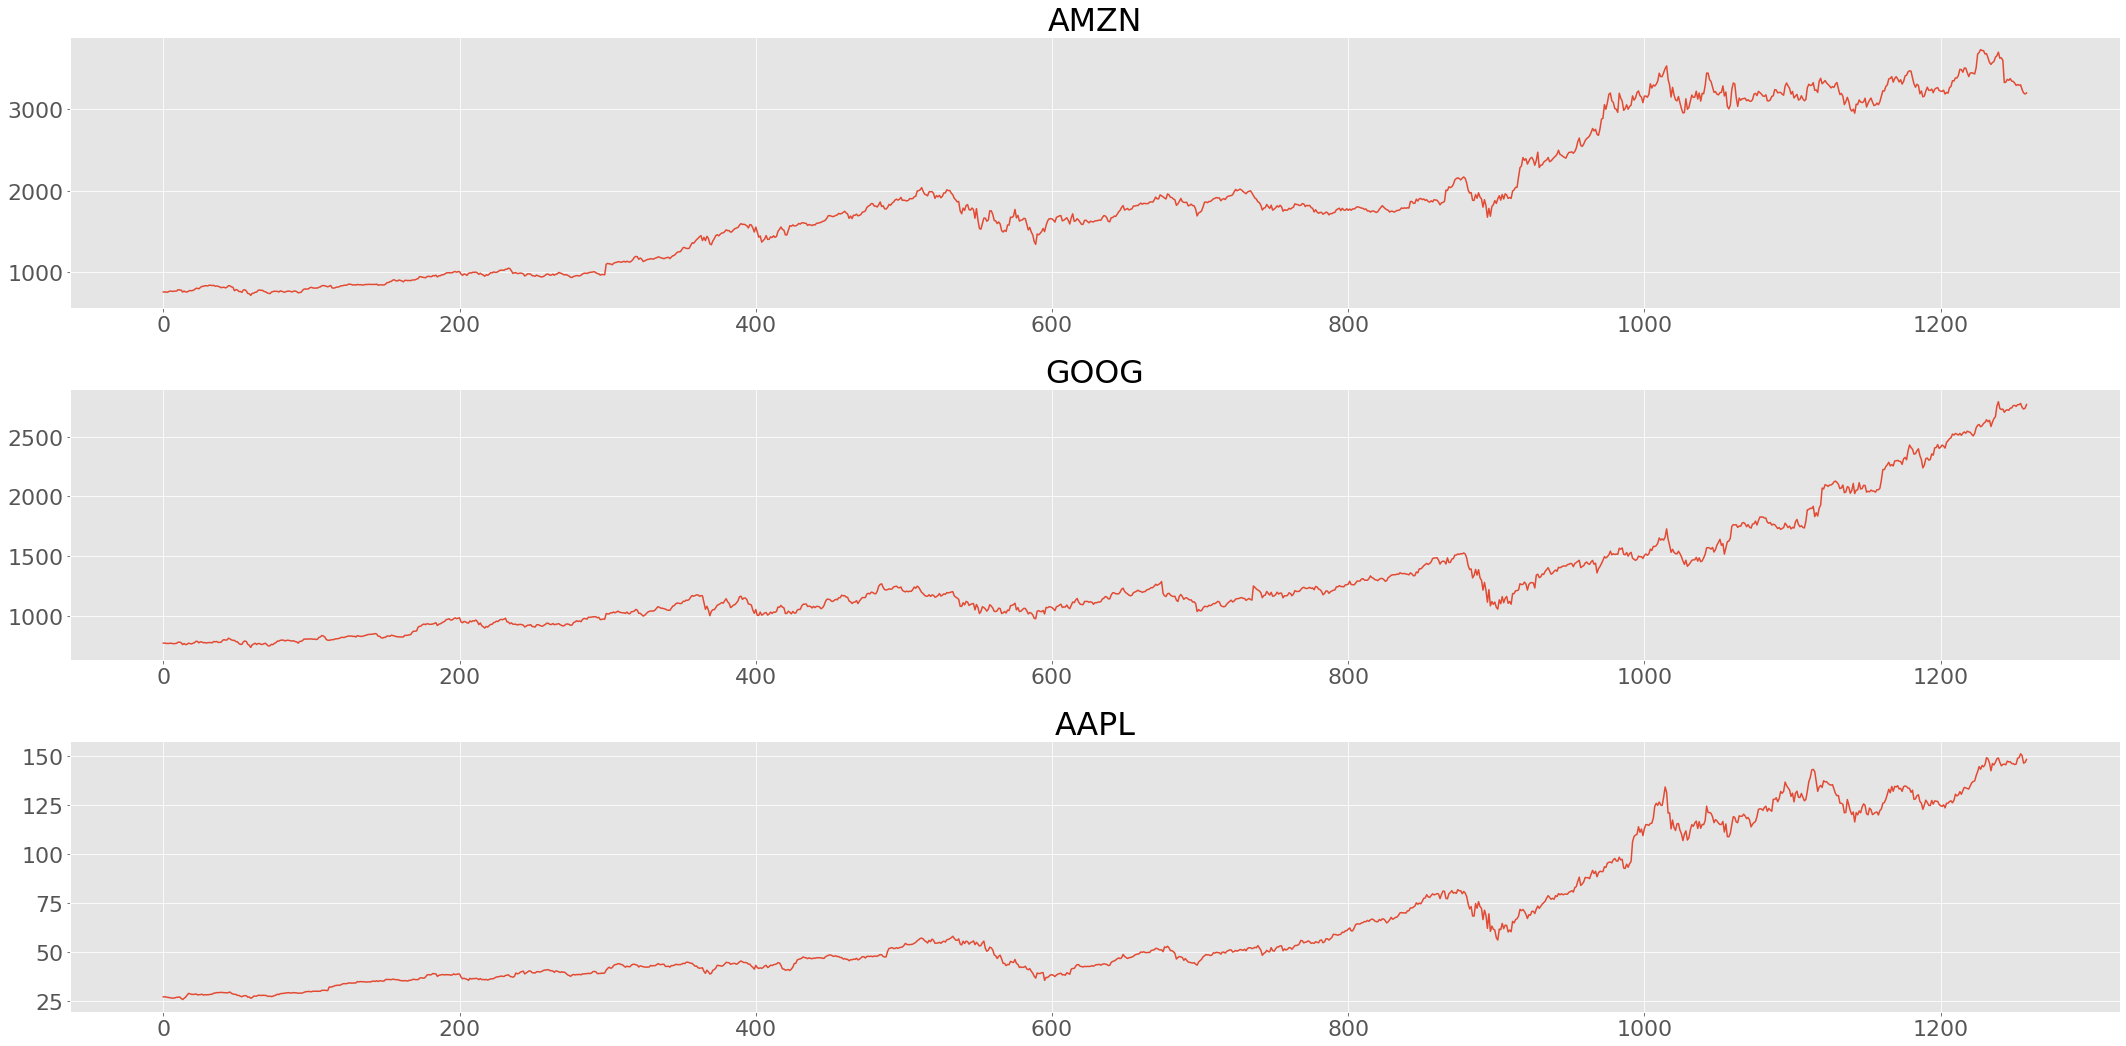

In [17]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(3, figsize=(30, 15))

for i, stock_name in enumerate(stock_dic):
    axs[i].plot(stock_dic[stock_name].loc[:, 'Close'])
    axs[i].set_title(stock_name)

plt.tight_layout()
plt.show()

In [19]:
AMZN_copy = AMZN.copy()

In [28]:
AMZN_copy.loc[0, 'Date']

Timestamp('2016-08-22 00:00:00')

In [21]:
AMZN_copy['Date'] = pd.to_datetime(AMZN['Date'], format="%Y-%m-%d")

In [23]:
# use high or mean instead?
close_series = AMZN_copy.loc[:, 'Close']
AMZN_copy = AMZN_copy.assign(rolling_close = close_series.rolling(10, center=True).mean())

In [26]:
#find percent difference between current day and past day
AMZN_copy = AMZN_copy.assign(percent_change = close_series.pct_change())
AMZN_copy.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,rolling_close,percent_diff
0,2016-08-22,757.500000,759.849976,752.099976,759.479980,759.479980,1679300,NaN,NaN
1,2016-08-23,763.309998,764.700012,761.000000,762.450012,762.450012,1524100,NaN,0.003911
2,2016-08-24,763.000000,763.409973,755.359985,757.250000,757.250000,1744100,NaN,-0.006820
3,2016-08-25,756.000000,760.559998,754.739990,759.219971,759.219971,1623000,NaN,0.002601
4,2016-08-26,760.049988,770.000000,759.799988,769.000000,769.000000,2776800,NaN,0.012882
5,2016-08-29,768.719971,774.979980,768.599976,771.289978,771.289978,2198600,765.848993,0.002978
6,2016-08-30,771.049988,771.840027,765.559998,767.580017,767.580017,1709200,768.787994,-0.004810
7,2016-08-31,766.599976,769.640015,764.000000,769.159973,769.159973,1633800,770.990991,0.002058
8,2016-09-01,770.900024,772.039978,766.750000,770.619995,770.619995,1792300,773.671991,0.001898
9,2016-09-02,774.109985,776.000000,771.700012,772.440002,772.440002,2181800,773.763995,0.002362


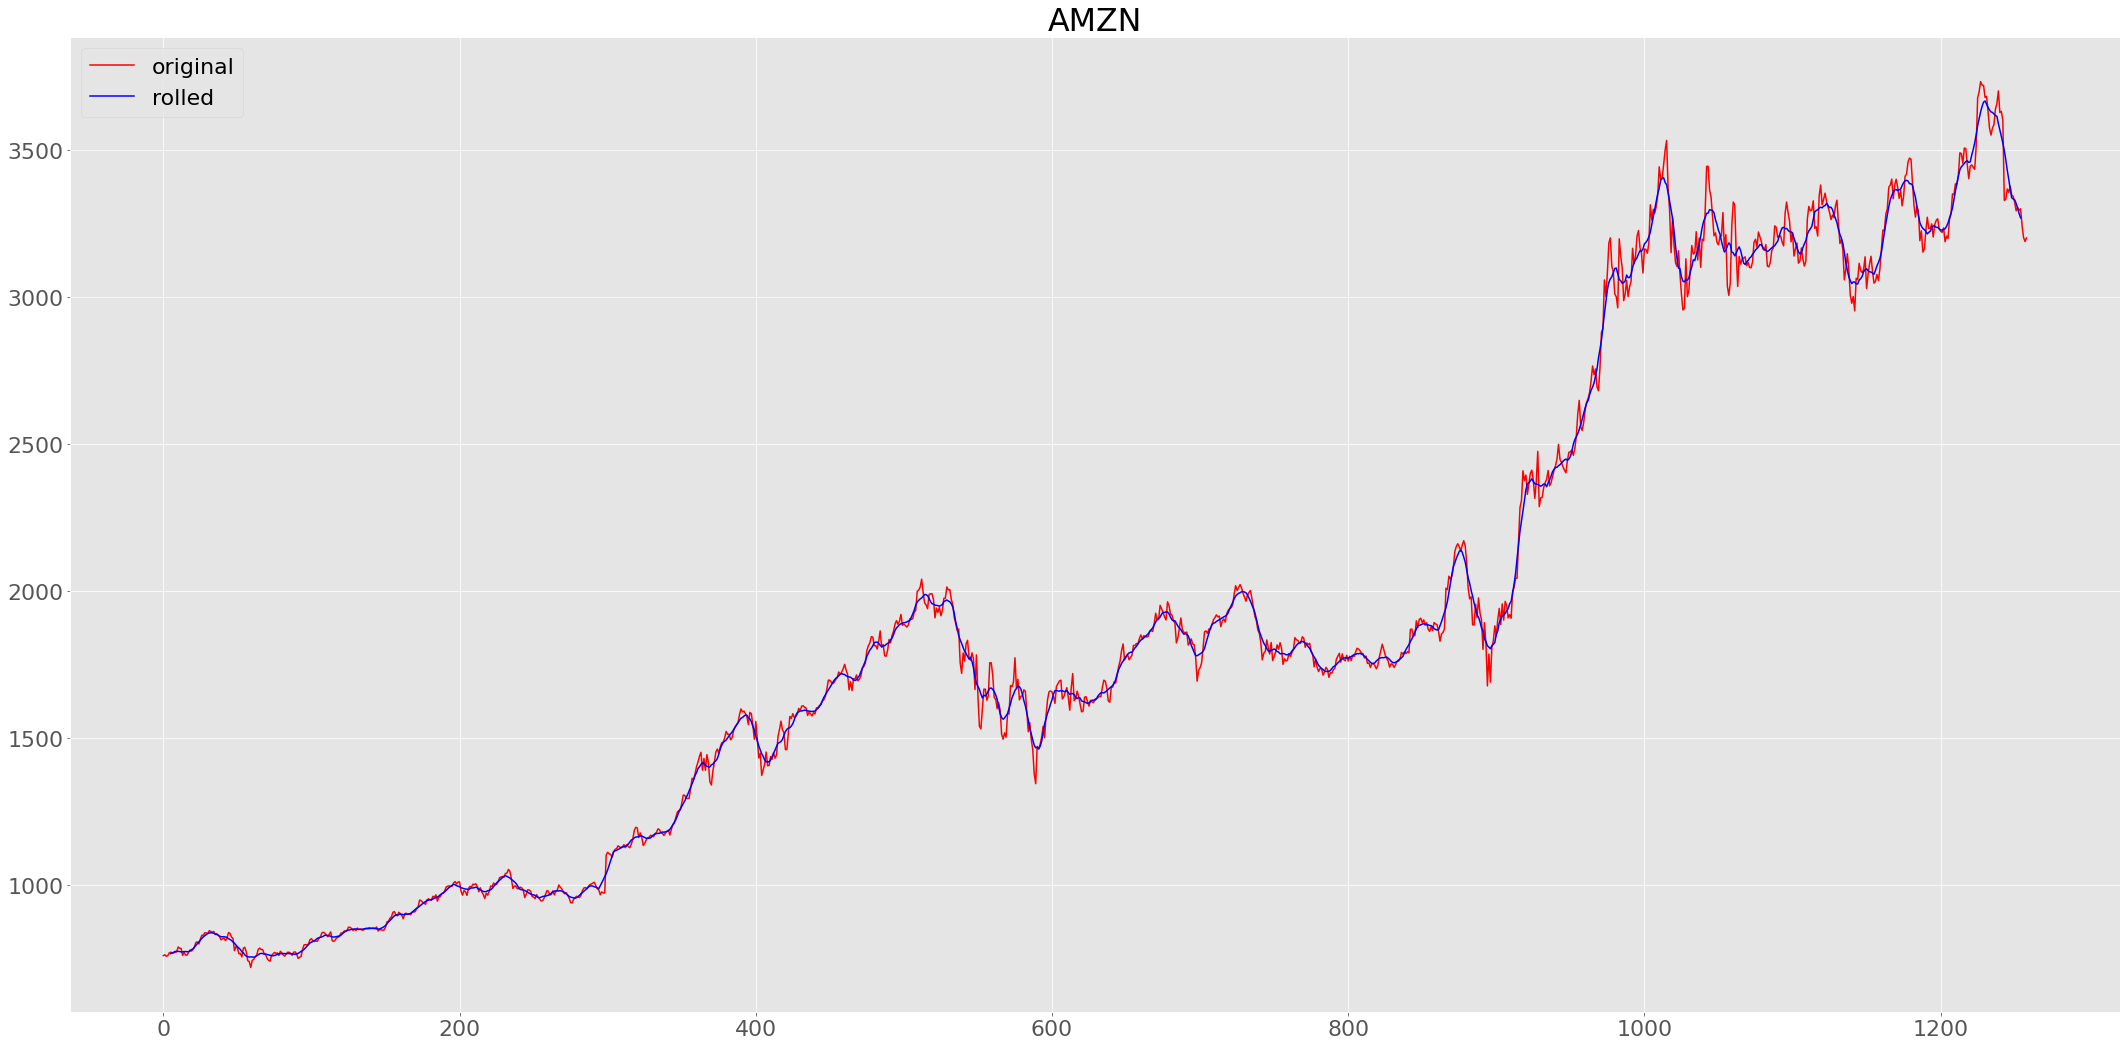

In [25]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30, 15))

ax.plot(AMZN.loc[:, 'Close'], color='r', label='original')
ax.set_title('AMZN')
ax.plot(AMZN_copy.loc[:, 'rolling_close'], color='b', label='rolled')

ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
def prep_stock_data(stock, stock_df, prepped_stock_df):
    # get stock volume
    prepped_stock_df.loc[:, f'{stock}_vol'] = stock_df.loc[:, 'Volume']

    # get stock average price
    mean_cols = stock_df.loc[: , 'High':'Low']
    stock_mean_df['mean'] = mean_cols.mean(axis=1)
    
    prepped_stock_df.loc[:, f'{stock}_rolling_close'] = 
    
    return prepped_stock_df

In [ ]:
prepped_stock_df = pd.DataFrame()

for i, stock in enumerate(stock_dic):
    if stock == 'AMZN':
        # want date in datetime for AMZN since this is the one we are predicting and set it to index
        prepped_stock_df.loc[:, 'Date'] = pd.to_datetime(stock_dic[stock].loc[:, 'Date'], format="%Y-%m-%d")
        prepped_stock_df.set_index('Date', inplace=True)
        
    # want rolling close, volume, and percent change for every stock
    prep_stock_data(stock, stock_dic[stock], prepped_stock_df)
    
    # drop nan rows